In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from sklearn import mixture

C:\Users\Yash Damania\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Yash Damania\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Yash Damania\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

<AxesSubplot:ylabel='Density'>

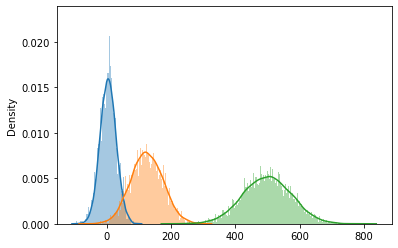

In [34]:
value1 = np.random.normal(loc=5,scale=25,size=10000)
value2 =  np.random.normal(loc=125,scale=50,size=10000)
value3 =  np.random.normal(loc=500,scale=75,size=10000)
#value4 =  np.random.normal(loc=1000,scale=25,size=10)
soda = np.concatenate((value1,value2,value3))
sns.distplot(value1,bins=500)
sns.distplot(value2,bins=500)
sns.distplot(value3,bins=500)

C:\Users\Yash Damania\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

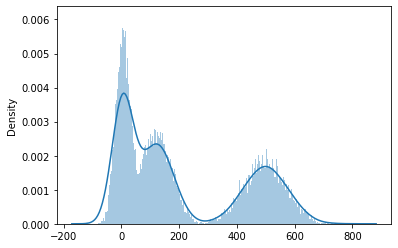

In [32]:
sns.distplot(soda,bins=500)

In [35]:
clf = mixture.GaussianMixture(n_components=5, covariance_type='full')
soda = soda.reshape(-1,1)
clf.fit(soda)

GaussianMixture(n_components=5)

In [36]:
print('Weights:',clf.weights_)
print('Means:\n',clf.means_)
#print(clf.covariances_)

Weights: [0.17978389 0.17078135 0.16239852 0.35349535 0.13354089]
Means:
 [[104.73197881]
 [545.4896021 ]
 [450.02128041]
 [  6.44712352]
 [166.77067507]]
